In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:

cabData = pd.read_csv('../DataSets/Cab_Data.csv')
cityData = pd.read_csv('../DataSets/City.csv')
customerData = pd.read_csv('../DataSets/Customer_ID.csv')
transactionData = pd.read_csv('../DataSets/Transaction_ID.csv')



# Exploring and joining data. 

In [3]:
cabData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
cabData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
359387    10440101
359388    10440104
359389    10440105
359390    10440106
359391    10440107
Name: Transaction ID, Length: 359392, dtype: int64

In [5]:
cityData

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
customerData

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
customerData['Customer ID'].drop_duplicates()

0        29290
1        27703
2        28712
3        28020
4        27182
         ...  
49166    12490
49167    14971
49168    41414
49169    41677
49170    39761
Name: Customer ID, Length: 49171, dtype: int64

In [8]:
transactionData

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [9]:
transactionData['Transaction ID'].drop_duplicates()

0         10000011
1         10000012
2         10000013
3         10000014
4         10000015
            ...   
440093    10440104
440094    10440105
440095    10440106
440096    10440107
440097    10440108
Name: Transaction ID, Length: 440098, dtype: int64

In [10]:
cab_transactionData = cabData.merge(right=transactionData, how='outer', on='Transaction ID').sort_values(by='Transaction ID')

In [11]:
cab_transactionData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359388,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card
359391,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card


In [12]:
cab_trans_city = cab_transactionData.merge(right=cityData, how="left", on='City')

In [13]:
cab_trans_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701"
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701"
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,"814,885","24,701"
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,"814,885","24,701"
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,"418,859","127,001"
440094,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,"418,859","127,001"
440095,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,"418,859","127,001"
440096,10440107,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,"418,859","127,001"


In [14]:
df = cab_trans_city.merge(right=customerData, how='left', on='Customer ID')

In [15]:
profit = df['Price Charged'] - df['Cost of Trip']

In [16]:
df.insert(loc=7, column='Profit', value=profit)

In [ ]:
df.pop('Users')

In [18]:
def toDate(days):
    start = date(1900,1,1) 
    delta = timedelta(days)
    return start + delta

In [19]:
df.dropna(inplace=True)

# Adding useful columns begins here. 

In [20]:
df['DateTime'] = df['Date of Travel'].apply(lambda x: toDate(x))

In [21]:

def getQuarter(date: date):
    return (date.month - 1) // 3 + 1


In [22]:
def getNumQuarter(quarter: str):
    x = quarter.split(sep='-')
    yr, q = int(x[0]), int(x[1])
    return yr + q / 10 

In [23]:
df['Year'] = df['DateTime'].apply(lambda x: x.year)
df['Quarter'] = df['DateTime'].apply(lambda x: getQuarter(x))
df['String Quarter'] = df['Year'].astype(str).str.cat(df['Quarter'].astype(str), sep='-')
df['Numeric Quarter'] = df['String Quarter'].apply(lambda x: getNumQuarter(x))

In [24]:
df.drop(columns=['Date of Travel', 'Population'], inplace=True)

In [25]:
def getAgeGroup(age):
    if 0 <= age < 18:
        return '0-17'
    elif 18 <= age < 40:
        return '18-40'
    elif 40 <= age < 65:
        return '41-65'
    else:
        return '65+'

In [26]:
df['Age Group'] = df['Age'].apply(lambda x: getAgeGroup(x))

In [27]:
salary_groups = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000+']

In [28]:
def getSalaryGroup(salary):
    if 0 <= salary <= 5000:
        return '0-5000'
    elif 5000 < salary <= 10000:
        return '5000-10000'
    elif 10000 < salary <= 15000:
        return '10000-15000'
    elif 15000 < salary <= 20000:
        return '15000-20000'
    elif 20000 < salary <= 25000:
        return '20000-25000'
    else:
        return '25000+'


In [29]:
df['Salary Group'] = df['Income (USD/Month)'].apply(lambda x: getSalaryGroup(x))

In [30]:
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),DateTime,Year,Quarter,String Quarter,Numeric Quarter,Age Group,Salary Group
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,2016-01-10,2016,1,2016-1,2016.1,18-40,10000-15000
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,2016-01-08,2016,1,2016-1,2016.1,18-40,5000-10000
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash,Male,53,11242,2016-01-04,2016,1,2016-1,2016.1,41-65,10000-15000
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash,Male,23,23327,2016-01-09,2016,1,2016-1,2016.1,18-40,20000-25000
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card,Male,33,8536,2016-01-05,2016,1,2016-1,2016.1,18-40,5000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440090,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash,Male,24,15651,2018-01-10,2018,1,2018-1,2018.1,18-40,15000-20000
440093,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash,Male,32,6528,2018-01-06,2018,1,2018-1,2018.1,18-40,5000-10000
440094,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash,Male,56,7966,2018-01-07,2018,1,2018-1,2018.1,41-65,5000-10000
440095,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card,Male,32,6423,2018-01-07,2018,1,2018-1,2018.1,18-40,5000-10000


In [31]:

df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198,35.336705,15048.822937
std,12.233526,274.378911,157.993661,160.311840,12.594234,7969.409482
min,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000
25%,12.000000,206.437500,151.200000,28.012000,25.000000,8424.000000
50%,22.440000,386.360000,282.480000,81.962000,33.000000,14685.000000
75%,32.960000,583.660000,413.683200,190.030000,42.000000,21035.000000
max,48.000000,2048.030000,691.200000,1463.966000,65.000000,35000.000000


In [32]:
pink = df.loc[df['Company'] == "Pink Cab"]

In [33]:
yellow = df.loc[df['Company'] == "Yellow Cab"]

In [34]:
pink[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,22.559917,310.800856,248.148682,62.652174,35.322414,15059.047137
std,12.231092,181.995661,135.403345,77.590378,12.644780,7991.077762
min,1.900000,15.600000,19.000000,-220.060000,18.000000,2000.000000
25%,12.000000,159.970000,131.868000,11.206000,25.000000,8371.000000
50%,22.440000,298.060000,246.330000,41.500000,33.000000,14713.000000
75%,32.960000,441.505000,360.180000,93.965000,42.000000,21055.000000
max,48.000000,1623.480000,576.000000,1119.480000,65.000000,35000.000000


In [35]:
yellow[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']].describe()

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month)
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,22.569517,458.181990,297.922004,160.259986,35.341112,15045.669817
std,12.234298,288.386166,162.548986,171.823833,12.578625,7962.727062
min,1.900000,20.730000,22.800000,-176.930800,18.000000,2000.000000
25%,11.990000,226.680000,158.400000,37.180000,25.000000,8439.000000
50%,22.440000,425.060000,295.596000,102.000000,33.000000,14676.000000
75%,32.960000,633.880000,432.432000,228.670400,42.000000,21023.000000
max,48.000000,2048.030000,691.200000,1463.966000,65.000000,34996.000000


# Plotting 

In [36]:
bins = range(-200, 1000, 50)

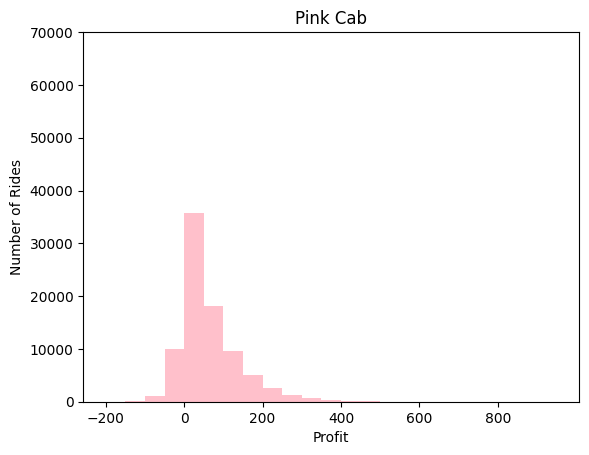

In [37]:
plt.hist(pink['Profit'], bins=bins, color='pink')
plt.xticks(bins[::4])
plt.ylim(0, 70000)

plt.title('Pink Cab')
plt.xlabel('Profit')
plt.ylabel('Number of Rides')
plt.show()


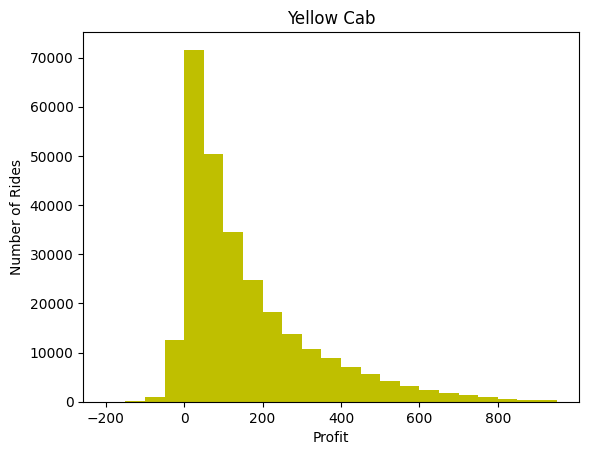

In [38]:
plt.hist(yellow['Profit'], bins=bins, color='y')
plt.xticks(bins[::4])

plt.title('Yellow Cab')
plt.xlabel('Profit')
plt.ylabel('Number of Rides')
plt.show()

# Research Questions 

> Per city, how many transactions has each company made? 

> Per fiscal quarter, how many transactions has each company made? 
    
 * By gender, age, salary

> What is the total profit for each company per fiscal quarter? 

> What is the total profit for each company per year? 

> What are the profit margins compared to user salary? Do users' company choice depend on salary? 

* Use $cov(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]$ where $X$ is a random variable giving salary, $Y$ is a random variable giving profit. 

> How many users continually use each company? (User retention)

* By gender, age, salary

> What is the mean profit per ride for each company by fiscal quarter? 

> What are the projected profits in the upcoming fiscal quarters by location?

 * Use a linear regression
 * Implement a web-app predicting profit for each company by location and fiscal quarter.  

> 1. Per city, how many transactions has each company made? 

In [39]:
P_CountByCity = pink[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()
Y_CountByCity = yellow[['City', 'Transaction ID']].groupby(['City'], as_index=False).count()

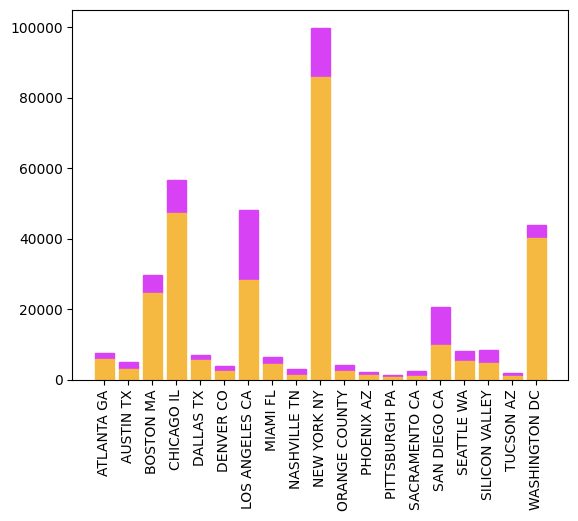

In [40]:

p = plt.bar(P_CountByCity['City'], P_CountByCity['Transaction ID'], bottom=Y_CountByCity['Transaction ID'])
y = plt.bar(Y_CountByCity['City'], Y_CountByCity['Transaction ID'] )
plt.xticks(rotation=90)

for bar in p:
    bar.set_color('#d742f5')

for bar in y:
    bar.set_color('#f5b942')
plt.show()


>> Conclusion: The yellow cab has an appreciably greater number of transactions in each city with the exception of LA and San Diego, where the pink cab performs equally well. 

> 2. Per fiscal quarter, how many transactions has each company made? 
    
 * By gender

In [41]:
def getTransactionsPerQuarter(d, quarter, feature):
    return d.groupby([quarter, feature], as_index=False).count()[[quarter, feature, 'Transaction ID']]

In [42]:
Y_CountByQG, P_CountByQG = getTransactionsPerQuarter(yellow, 'String Quarter', 'Gender'), getTransactionsPerQuarter(pink, 'String Quarter', 'Gender')

In [43]:
pmd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Male']
pfd = P_CountByQG.loc[P_CountByQG['Gender'] == 'Female']
ymd = Y_CountByQG.loc[Y_CountByQG['Gender'] == 'Male']
yfd = Y_CountByQG.loc[Y_CountByQG['Gender'] == 'Female']

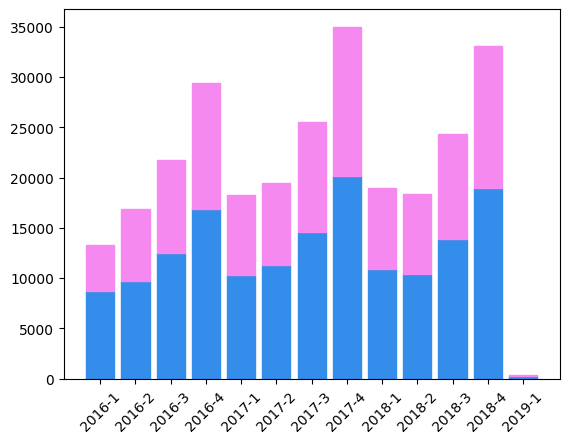

In [45]:
ym = plt.bar(ymd['String Quarter'], ymd['Transaction ID'])
yf = plt.bar(yfd['String Quarter'], yfd['Transaction ID'], bottom=ymd['Transaction ID'])



plt.xticks(rotation=45)

for bar in ym:
    bar.set_color('#348ceb')

for bar in yf:
    bar.set_color('#f589ef')


plt.show()


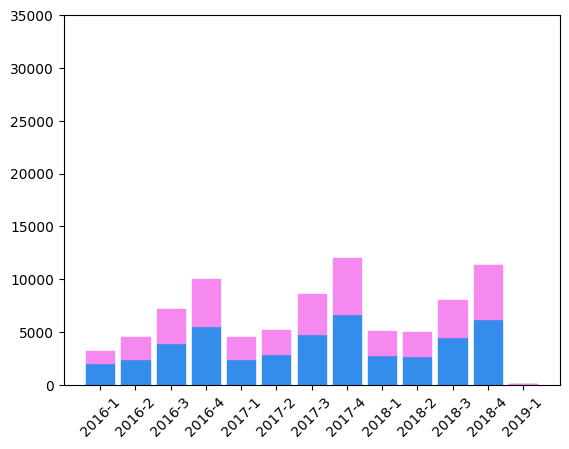

In [85]:
pm = plt.bar(pmd['String Quarter'], pmd['Transaction ID'])
pf = plt.bar(pfd['String Quarter'], pfd['Transaction ID'], bottom=pmd['Transaction ID'])



plt.xticks(rotation=45)

for bar in pm:
    bar.set_color('#348ceb')

for bar in pf:
    bar.set_color('#f589ef')

plt.ylim(0, 35000)
plt.show()


* By age

In [46]:
pad, yad = getTransactionsPerQuarter(pink, 'String Quarter', 'Age Group'), getTransactionsPerQuarter(yellow, 'String Quarter', 'Age Group')

In [47]:
pdI = pad.loc[pad['Age Group'] == '18-40']
pdII = pad.loc[pad['Age Group'] == '41-65']
pdIII = pad.loc[pad['Age Group'] == '65+']

ydI = yad.loc[yad['Age Group'] == '18-40']
ydII = yad.loc[yad['Age Group'] == '41-65']
ydIII = yad.loc[yad['Age Group'] == '65+']

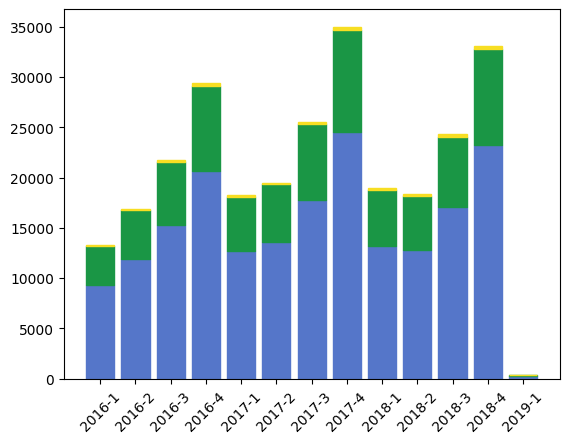

In [48]:
yI = plt.bar(ydI['String Quarter'], ydI['Transaction ID'] )
yII = plt.bar(ydII['String Quarter'], ydII['Transaction ID'], bottom= ydI['Transaction ID'] )
yIII = plt.bar(ydIII['String Quarter'], ydIII['Transaction ID'], bottom=  np.array(ydI['Transaction ID']) + np.array(ydII['Transaction ID']))

plt.xticks(rotation=45)

for bar in yI:
    bar.set_color('#5576c9')

for bar in yII:
    bar.set_color('#1a9645')

for bar in yIII:
    bar.set_color('#f7de23')
    
plt.show()

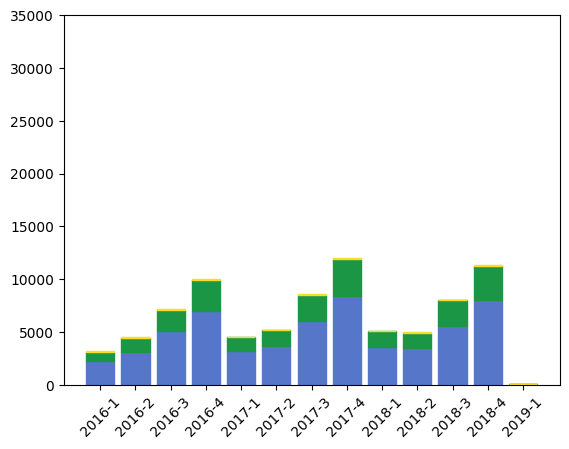

In [84]:
pI = plt.bar(pdI['String Quarter'], pdI['Transaction ID'] )
pII = plt.bar(pdII['String Quarter'], pdII['Transaction ID'], bottom= pdI['Transaction ID'] )
pIII = plt.bar(pdIII['String Quarter'], pdIII['Transaction ID'], bottom= np.array(pdI['Transaction ID']) + np.array(pdII['Transaction ID']))

plt.xticks(rotation=45)
plt.ylim(0, 35000)

for bar in pI:
    bar.set_color('#5576c9')

for bar in pII:
    bar.set_color('#1a9645')

for bar in pIII:
    bar.set_color('#f7de23')
    
plt.show()

* By salary

In [63]:
psd, ysd = getTransactionsPerQuarter(yellow, 'String Quarter', 'Salary Group'), getTransactionsPerQuarter(pink, 'String Quarter', 'Salary Group')

In [65]:
psdGroups = [psd.loc[psd['Salary Group'] == salary_group] for salary_group in salary_groups]
ysdGroups = [ysd.loc[ysd['Salary Group'] == salary_group] for salary_group in salary_groups]

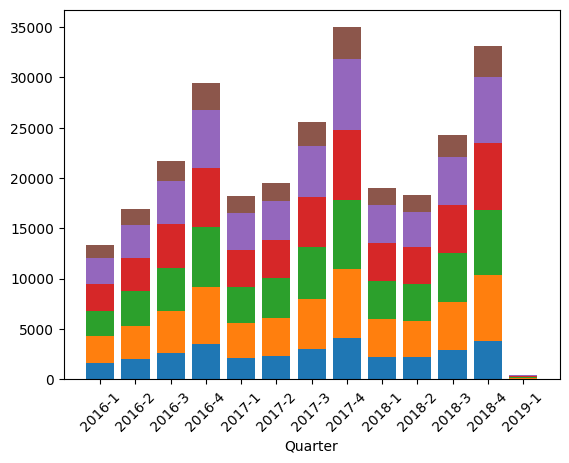

In [81]:
for i in range(len(psdGroups)):
    plt.bar(psdGroups[i]['String Quarter'], psdGroups[i]['Transaction ID'], bottom=np.sum([np.array(prev['Transaction ID']) for prev in psdGroups[:i]], axis=0))

plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.show()


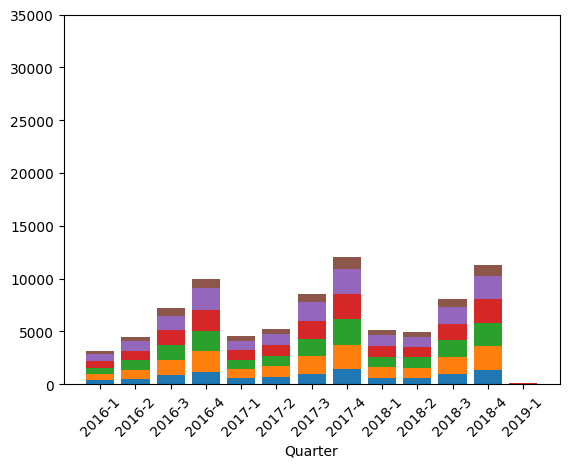

In [83]:
for i in range(len(ysdGroups)):
    plt.bar(ysdGroups[i]['String Quarter'], ysdGroups[i]['Transaction ID'], bottom=np.sum([np.array(prev['Transaction ID']) for prev in ysdGroups[:i]], axis=0))

plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylim(0, 35000)
plt.show()

>> Conclusions
 * Transactions are roughly uniformly distributed by gender for both companies.
 * Transactions are highest in the 18-45 age group for both companies.
 * Transacions are roughly uniformly distributed across the $5000-$25000 monthly income classes for both companies, with the other two classes being the lowest. 
 * For each company and each feature aforementioned, transactions increase generally throughout the quarters in a given year, with transactions in the 4th quarter being highest. 
 * Across each feature, and given any quarter, the yellow cab company has achieved more transactions. 

> 3. What is the total profit for each company per fiscal quarter? 